In [3]:
# Boilerplate imports for data-science work (place this in a new notebook cell at index 0)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import cv2
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# plotting defaults
sns.set(style='whitegrid', context='notebook', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.cmap'] = 'viridis'

Depth shape: (192, 256), Depth dtype: uint16


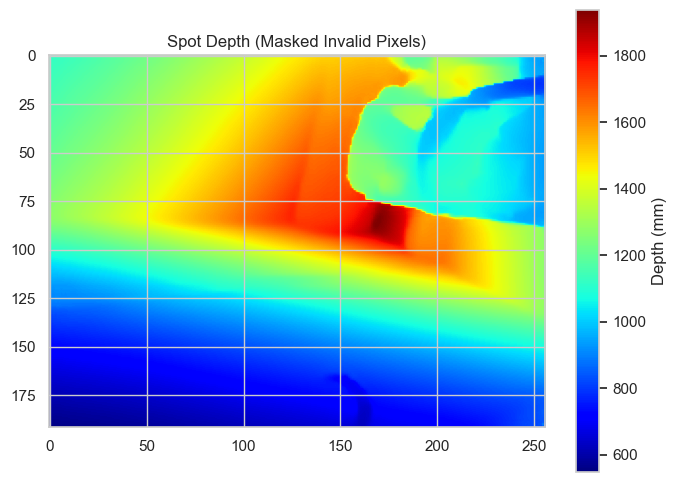

In [4]:
file_path = '2ebf66b16d/depth/000001.png'
# Load Spot depth (uint16 PNG)
depth = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

print(f"Depth shape: {depth.shape}, Depth dtype: {depth.dtype}")

plt.figure(figsize=(8, 6))
plt.imshow(depth, cmap="jet")
plt.colorbar(label="Depth (mm)")
plt.title("Spot Depth (Masked Invalid Pixels)")
plt.show()


RGB shape: (720, 960, 3), RGB dtype: uint8


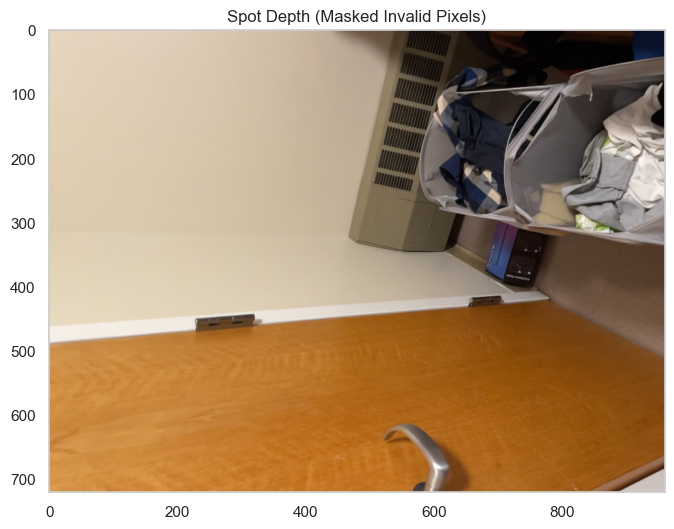

In [5]:
file_path = '2ebf66b16d/rgb_frames/00001.jpg'
# Load Spot depth (uint16 PNG)
rgb = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
w_resized, h_resized = int(rgb.shape[1] * 0.5), int(rgb.shape[0] * 0.5)
rgb = cv2.resize(rgb, (w_resized, h_resized))

print(f"RGB shape: {rgb.shape}, RGB dtype: {rgb.dtype}")

plt.figure(figsize=(8, 6))
plt.imshow(rgb)
plt.title("Spot Depth (Masked Invalid Pixels)")
plt.grid(False)
plt.show()


In [1]:
from fastsam import FastSAM, FastSAMPrompt

model = FastSAM('sam_ckpt/FastSAM-x.pt')
DEVICE = 'cuda'
everything_results = model(file_path, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
prompt_process = FastSAMPrompt(file_path, everything_results, device=DEVICE)

# everything prompt
ann = prompt_process.everything_prompt()

prompt_process.plot(annotations=ann,output_path='./output/dog.jpg',)


ModuleNotFoundError: No module named 'fastsam'

In [2]:
# check if gpu is available
import torch
print(torch.cuda.is_available())

True


In [2]:
print(torch.version.cuda)

12.8
